**Group Q:**<br>
Laura Cuna, 20211312<br>
Amelie Langenstein, 20210637<br>
Tongjiuzhou Liu, 20211012<br>
Nina Urbancic, 20211314

## BC4: Cryptocurrency Value Prediction

## Contents of this notebook

- [Business Understanding](#Business-Understanding)
    - [Determine Business Objectives](#Determine-Business-Objectives)
    - [Determine Data Mining Goals](#Determine-Data-Mining-Goals)
- [Data Understanding](#Data-Understanding)
    - [Dataset description](#Dataset-description)
    - [Collect initial data](#Collect-initial-data)
    - [Describe, explore and assess data quality](#Describe,-explore-and-assess-data-quality)
    - [Verify data quality](#Verify-data-quality)
- [Data Preparation](#Data-Preparation)
    - [Select data](#Select-data)
    - [Clean data](#Clean-data)
    - [Construct data](#Construct-data)
- [Modeling](#Modeling)
    - [Select modeling technique](#Select-modeling-technique)
    - [Generate test design](#Generate-test-design)
    - [Build and assess model](#Build-and-assess-model)
- [Evaluation and Deployment](#Evaluation-and-Deployment)
    - [Evaluation](#Evaluation)
    - [Deployment](#Deployment)

# Business Understanding

## Determine Business Objectives

## Determine Data Mining Goals

# Data Understanding

In [1]:
import os
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from plotnine import *
import plotnine
import seaborn as sns
import networkx as nx

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from kmodes.kprototypes import KPrototypes
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [2]:
#Visualization settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_style("white")

### Dataset description

### Collect initial data

In [3]:
# Read csv files
df = pd.read_csv('data\adj_close.csv')
df = pd.read_csv('data\adj_close.csv')
df = pd.read_csv('data\adj_close.csv')
df = pd.read_csv('data\adj_close.csv')
df = pd.read_csv('data\adj_close.csv')
df = pd.read_csv('data\adj_close.csv')
df_ = df.copy()

### Describe, explore and assess data quality

In [4]:
#display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#display top rows
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [7]:
# Statistics summary for all variables
df.describe(include='all').transpose()

count unique                                 top    freq  \
InvoiceNo      541909  25900                              573585    1114   
StockCode      541909   4070                              85123A    2313   
Description    540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369   
Quantity     541909.0    NaN                                 NaN     NaN   
InvoiceDate    541909  23260                    10/31/2011 14:41    1114   
UnitPrice    541909.0    NaN                                 NaN     NaN   
CustomerID   406829.0    NaN                                 NaN     NaN   
Country        541909     38                      United Kingdom  495478   

                    mean          std       min      25%      50%      75%  \
InvoiceNo            NaN          NaN       NaN      NaN      NaN      NaN   
StockCode            NaN          NaN       NaN      NaN      NaN      NaN   
Description          NaN          NaN       NaN      NaN      NaN      NaN   
Quantity         9.55225   218.081158  -80995.0      1.0      3.0     10.0   
InvoiceDate          NaN          NaN       NaN      NaN      NaN      NaN   
UnitPrice       4.611114    96.759853 -11062.06     1.25     2.08     4.13   
CustomerID   15287.69057  1713.600303   12346.0  13953.0  15152.0  16791.0   
Country              NaN          NaN       NaN      NaN      NaN      NaN   

                 max  
InvoiceNo        NaN  
StockCode        NaN  
Description      NaN  
Quantity     80995.0  
InvoiceDate      NaN  
UnitPrice    38970.0  
CustomerID   18287.0  
Country          NaN

In [8]:
df.set_index(['CustomerID','InvoiceNo']).head(50)

StockCode                          Description  Quantity  \
CustomerID InvoiceNo                                                            
17850.0    536365       85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
           536365        71053                  WHITE METAL LANTERN         6   
           536365       84406B       CREAM CUPID HEARTS COAT HANGER         8   
           536365       84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
           536365       84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
           536365        22752         SET 7 BABUSHKA NESTING BOXES         2   
           536365        21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
           536366        22633               HAND WARMER UNION JACK         6   
           536366        22632            HAND WARMER RED POLKA DOT         6   
13047.0    536367        84879        ASSORTED COLOUR BIRD ORNAMENT        32   
           536367        22745           POPPY'S PLAYHOUSE BEDROOM          6   
           536367        22748            POPPY'S PLAYHOUSE KITCHEN         6   
           536367        22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
           536367        22310              IVORY KNITTED MUG COSY          6   
           536367        84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   
           536367        22623        BOX OF VINTAGE JIGSAW BLOCKS          3   
           536367        22622       BOX OF VINTAGE ALPHABET BLOCKS         2   
           536367        21754             HOME BUILDING BLOCK WORD         3   
           536367        21755             LOVE BUILDING BLOCK WORD         3   
           536367        21777          RECIPE BOX WITH METAL HEART         4   
           536367        48187                  DOORMAT NEW ENGLAND         4   
           536368        22960             JAM MAKING SET WITH JARS         6   
           536368        22913          RED COAT RACK PARIS FASHION         3   
           536368        22912       YELLOW COAT RACK PARIS FASHION         3   
           536368        22914         BLUE COAT RACK PARIS FASHION         3   
           536369        21756             BATH BUILDING BLOCK WORD         3   
12583.0    536370        22728            ALARM CLOCK BAKELIKE PINK        24   
           536370        22727            ALARM CLOCK BAKELIKE RED         24   
           536370        22726           ALARM CLOCK BAKELIKE GREEN        12   
           536370        21724      PANDA AND BUNNIES STICKER SHEET        12   
           536370        21883                     STARS GIFT TAPE         24   
           536370        10002          INFLATABLE POLITICAL GLOBE         48   
           536370        21791   VINTAGE HEADS AND TAILS CARD GAME         24   
           536370        21035      SET/2 RED RETROSPOT TEA TOWELS         18   
           536370        22326  ROUND SNACK BOXES SET OF4 WOODLAND         24   
           536370        22629                  SPACEBOY LUNCH BOX         24   
           536370        22659              LUNCH BOX I LOVE LONDON        24   
           536370        22631             CIRCUS PARADE LUNCH BOX         24   
           536370        22661      CHARLOTTE BAG DOLLY GIRL DESIGN        20   
           536370        21731        RED TOADSTOOL LED NIGHT LIGHT        24   
           536370        22900      SET 2 TEA TOWELS I LOVE LONDON         24   
           536370        21913       VINTAGE SEASIDE JIGSAW PUZZLES        12   
           536370        22540           MINI JIGSAW CIRCUS PARADE         24   
           536370        22544                 MINI JIGSAW SPACEBOY        24   
           536370        22492              MINI PAINT SET VINTAGE         36   
           536370         POST                              POSTAGE         3   
13748.0    536371        22086      PAPER CHAIN KIT 50'S CHRISTMAS         80   
17850.0    536372        22632            HAND WARME

In [9]:
Description=pd.DataFrame(df['Description'].unique())

In [10]:
Description.isnull().value_counts()

False    4223
True        1
dtype: int64

In [11]:
df[df['Description'].str.islower().fillna(False)]['Description'].unique()

array(['amazon', 'check', 'damages', 'faulty', 'amazon sales',
       'reverse 21/5/10 adjustment', 'mouldy, thrown away.', 'found',
       'counted', 'label mix up', 'samples/damages', 'thrown away',
       'incorrectly made-thrown away.', 'showroom',
       'wrongly sold as sets', 'dotcom sold sets', 'wrongly sold sets',
       '? sold as sets?', '?sold as sets?', 'damages/display',
       'damaged stock', 'broken', 'throw away', 'wrong barcode (22467)',
       'wrongly sold (22719) barcode', 'wrong barcode', 'barcode problem',
       '?lost', "thrown away-can't sell.", "thrown away-can't sell",
       'rcvd be air temp fix for dotcom sit', 'damages?',
       're dotcom quick fix.', 'sold in set?', 'cracked', 'sold as 22467',
       'damaged', 'did  a credit  and did not tick ret', 'adjustment',
       'returned', 'wrong code?', 'wrong code', 'adjust', 'crushed',
       'damages/showroom etc', 'samples', 'mailout ', 'mailout',
       'sold as set/6 by dotcom', 'wet/rusty', 'damages/d

In [12]:
df[df['Description'].str.isupper().fillna(False)]['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'LETTER "U" BLING KEY RING',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [13]:
df.Description.nunique()

4223

In [14]:
df[df['Description'].str.isupper().fillna(False)]['Description'].nunique()

4018

In [15]:
df[df['Description'].str.islower().fillna(False)]['Description'].nunique()

127

In [16]:
df.StockCode.nunique()

4070

In [17]:
df[df['Quantity']==0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [18]:
pd.DataFrame(df['StockCode'].unique())

0
0     85123A
1      71053
2     84406B
3     84029G
4     84029E
...      ...
4065  85179a
4066   23617
4067  90214U
4068  47591b
4069   23843

[4070 rows x 1 columns]

In [19]:
# Check missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
df[df['Description'].isnull()]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   

        CustomerID         Country  
622            NaN  United Kingdom  
1970           NaN  United Kingdom  
1971           NaN  United Kingdom  
1972           NaN  United Kingdom  
1987           NaN  United Kingdom  
...            ...             ...  
535322         NaN  United Kingdom  
535326         NaN  United Kingdom  
535332         NaN  United Kingdom  
536981         NaN  United Kingdom  
538554         NaN  United Kingdom  

[1454 rows x 8 columns]

In [21]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [22]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### First Visual Exploration

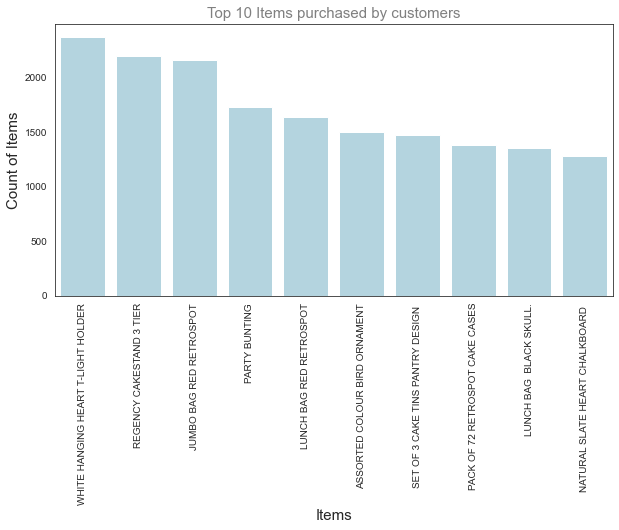

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x = df.Description.value_counts().head(10).index, y = df.Description.value_counts().head(10).values, color='lightblue')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 10 Items purchased by customers', color = 'grey', size = 15)
plt.show()

In [24]:
#the following EDA part should is only possible after the new features are created
#so not really part of Data Understanding, if new features are not yet created
#transform the InvoiceDate to pandas datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)

In [25]:
#create year month day and hour of orders
df['year'] = df['InvoiceDate'].dt.year

df['month'] = df['InvoiceDate'].dt.month

df['day'] = df['InvoiceDate'].dt.day

df['hour'] = df['InvoiceDate'].dt.hour

df['day_of_week']=df['InvoiceDate'].dt.weekday

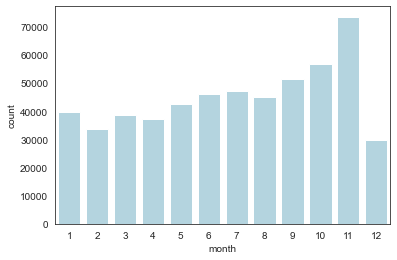

In [26]:
sns.countplot(df["month"].astype(int), color='lightblue')
plt.show()

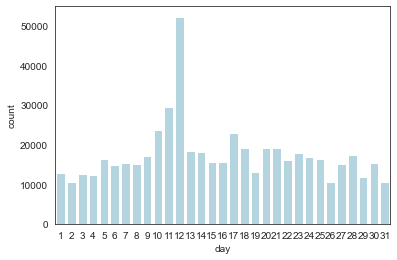

In [27]:
sns.countplot(df["day"].astype(int), color='lightblue')
plt.show()

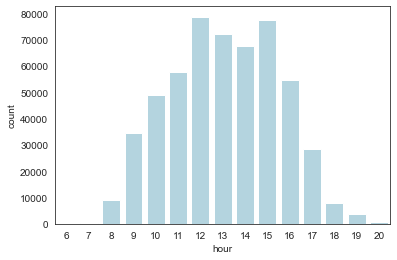

In [28]:
sns.countplot(df["hour"].astype(int), color='lightblue')
plt.show()

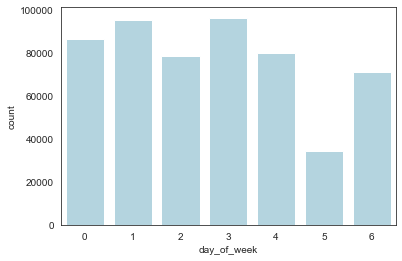

In [29]:
sns.countplot(df["day_of_week"].astype(int), color='lightblue')
plt.show()

### Verify data quality

In [30]:
#check if there are records with "quantity" less than 0
df[df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  year  \
141    2010-01-12 09:41:00      27.50     14527.0  United Kingdom  2010   
154    2010-01-12 09:49:00       4.65     15311.0  United Kingdom  2010   
235    2010-01-12 10:24:00       1.65     17548.0  United Kingdom  2010   
236    2010-01-12 10:24:00       0.29     17548.0  United Kingdom  2010   
237    2010-01-12 10:24:00       0.29     17548.0  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
540449 2011-09-12 09:57:00       0.83     14397.0  United Kingdom  2011   
541541 2011-09-12 10:28:00     224.69     15498.0  United Kingdom  2011   
541715 2011-09-12 11:57:00      10.95     15311.0  United Kingdom  2011   
541716 2011-09-12 11:58:00       1.25     17315.0  United Kingdom  2011   
541717 2011-09-12 11:58:00       1.25     17315.0  United Kingdom  2011   

        month  day  hour  day_of_week  
141         1   12     9            1  
154         1   12     9            1  
235         1   12    10            1  
236         1   12    10            1  
237         1   12    10            1  
...       ...  ...   ...          ...  
540449      9   12     9            0  
541541      9   12    10            0  
541715      9   12    11            0  
541716      9   12    11            0  
541717      9   12    11            0  

[10624 rows x 13 columns]

In [31]:
#check if there are records with "UnitPrice" less than 0
df[df['UnitPrice']<0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-12-08 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-12-08 14:52:00   

        UnitPrice  CustomerID         Country  year  month  day  hour  \
299983  -11062.06         NaN  United Kingdom  2011     12    8    14   
299984  -11062.06         NaN  United Kingdom  2011     12    8    14   

        day_of_week  
299983            3  
299984            3

# Data Preparation

### Select data

In [32]:
dfp = df.copy()

### Clean data

In [33]:
#Separate cancelled orders
df_canceled=dfp[dfp['InvoiceNo'].str.contains("C")]
dfp=dfp[~dfp.isin(df_canceled)].dropna(how = 'all')
dfp

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL        4.0   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID         Country    year  \
0      2010-01-12 08:26:00       2.55     17850.0  United Kingdom  2010.0   
1      2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010.0   
2      2010-01-12 08:26:00       2.75     17850.0  United Kingdom  2010.0   
3      2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010.0   
4      2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010.0   
...                    ...        ...         ...             ...     ...   
541904 2011-09-12 12:50:00       0.85     12680.0          France  2011.0   
541905 2011-09-12 12:50:00       2.10     12680.0          France  2011.0   
541906 2011-09-12 12:50:00       4.15     12680.0          France  2011.0   
541907 2011-09-12 12:50:00       4.15     12680.0          France  2011.0   
541908 2011-09-12 12:50:00       4.95     12680.0          France  2011.0   

        month   day  hour  day_of_week  
0         1.0  12.0   8.0          1.0  
1         1.0  12.0   8.0          1.0  
2         1.0  12.0   8.0          1.0  
3         1.0  12.0   8.0          1.0  
4         1.0  12.0   8.0          1.0  
...       ...   ...   ...          ...  
541904    9.0  12.0  12.0          0.0  
541905    9.0  12.0  12.0          0.0  
541906    9.0  12.0  12.0          0.0  
541907    9.0  12.0  12.0          0.0  
541908    9.0  12.0  12.0          0.0  

[532621 rows x 13 columns]

In [34]:
# remove the Invalid data 
dfp = dfp[dfp['Quantity']>0]
dfp = dfp[dfp['UnitPrice']>0]

In [35]:
# The unique values of these 2 variables (Description & StockCode) should be equal, because each stock code represents a product:

df_product = dfp[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["Description"]).agg({"StockCode":"count"}).reset_index()
df_product = df_product[df_product["StockCode"]>1]
df_product

Description  StockCode
46      3 GARDENIA MORRIS BOXED CANDLES          2
61    3 WHITE CHOC MORRIS BOXED CANDLES          2
72         3D DOG PICTURE PLAYING CARDS          2
74             3D SHEET OF CAT STICKERS          2
75             3D SHEET OF DOG STICKERS          2
...                                 ...        ...
3906        WOODEN FRAME ANTIQUE WHITE           2
3935       WOVEN BERRIES CUSHION COVER           2
3936     WOVEN BUBBLE GUM CUSHION COVER          2
3937         WOVEN CANDY CUSHION COVER           2
3939   WOVEN ROSE GARDEN CUSHION COVER           2

[131 rows x 2 columns]

In [36]:
# remove the products with more than one stockcode
dfp = dfp[~dfp["Description"].isin(df_product["Description"])]

In [37]:
df_product = dfp[["Description","StockCode"]].drop_duplicates()
df_product = df_product.groupby(["StockCode"]).agg({"Description":"count"}).reset_index()
df_product = df_product[df_product["Description"] > 1] 
df_product

StockCode  Description
36      16156L            2
94      17107D            3
111      20622            2
163      20725            2
254      20914            2
...        ...          ...
3203     85144            2
3237    85185B            2
3304    90014A            2
3305    90014B            2
3306    90014C            2

[205 rows x 2 columns]

In [38]:
# remove stock codes that represent multiple products:
dfp = dfp[~dfp["StockCode"].isin(df_product["StockCode"])]

In [39]:
# The post statement in the stock code shows the postage cost, let's delete it as it is not a product:
dfp = dfp[~dfp["StockCode"].str.contains("POST", na=False)]

In [40]:
#drop the lowercase in Description
dfp=dfp[dfp['Description'].str.isupper()]
dfp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461038 entries, 2 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    461038 non-null  object        
 1   StockCode    461038 non-null  object        
 2   Description  461038 non-null  object        
 3   Quantity     461038 non-null  float64       
 4   InvoiceDate  461038 non-null  datetime64[ns]
 5   UnitPrice    461038 non-null  float64       
 6   CustomerID   344520 non-null  float64       
 7   Country      461038 non-null  object        
 8   year         461038 non-null  float64       
 9   month        461038 non-null  float64       
 10  day          461038 non-null  float64       
 11  hour         461038 non-null  float64       
 12  day_of_week  461038 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 49.2+ MB


### Construct data

In [41]:
#transform the InvoiceDate to pandas datetime
dfp['InvoiceDate'] = pd.to_datetime(dfp['InvoiceDate'],dayfirst=True)
dfp

InvoiceNo StockCode                          Description  Quantity  \
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
5         536365     22752         SET 7 BABUSHKA NESTING BOXES       2.0   
6         536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER       6.0   
...          ...       ...                                  ...       ...   
541902    581587     22629                  SPACEBOY LUNCH BOX       12.0   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS      12.0   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL        6.0   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE       4.0   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT        3.0   

               InvoiceDate  UnitPrice  CustomerID         Country    year  \
2      2010-01-12 08:26:00       2.75     17850.0  United Kingdom  2010.0   
3      2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010.0   
4      2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010.0   
5      2010-01-12 08:26:00       7.65     17850.0  United Kingdom  2010.0   
6      2010-01-12 08:26:00       4.25     17850.0  United Kingdom  2010.0   
...                    ...        ...         ...             ...     ...   
541902 2011-09-12 12:50:00       1.95     12680.0          France  2011.0   
541904 2011-09-12 12:50:00       0.85     12680.0          France  2011.0   
541905 2011-09-12 12:50:00       2.10     12680.0          France  2011.0   
541907 2011-09-12 12:50:00       4.15     12680.0          France  2011.0   
541908 2011-09-12 12:50:00       4.95     12680.0          France  2011.0   

        month   day  hour  day_of_week  
2         1.0  12.0   8.0          1.0  
3         1.0  12.0   8.0          1.0  
4         1.0  12.0   8.0          1.0  
5         1.0  12.0   8.0          1.0  
6         1.0  12.0   8.0          1.0  
...       ...   ...   ...          ...  
541902    9.0  12.0  12.0          0.0  
541904    9.0  12.0  12.0          0.0  
541905    9.0  12.0  12.0          0.0  
541907    9.0  12.0  12.0          0.0  
541908    9.0  12.0  12.0          0.0  

[461038 rows x 13 columns]

In [42]:
#create year month day and hour of orders
dfp['year'] = dfp['InvoiceDate'].dt.year

dfp['month'] = dfp['InvoiceDate'].dt.month

dfp['day'] = dfp['InvoiceDate'].dt.day

dfp['hour'] = dfp['InvoiceDate'].dt.hour

dfp['day_of_week']=dfp['InvoiceDate'].dt.weekday

In [43]:
#cauculate total price
dfp['total_price'] = dfp['UnitPrice']*dfp['Quantity']

## Explore Data (after Data Preparation because creating new features was necessary for EDA)

###  Q1 When do people order?

### Hour of day

In [151]:
hour_of_day = pd.pivot_table(dfp, values=['Quantity', 'total_price'], index=['hour'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum})

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(go.Bar(y=hour_of_day['Quantity'],name='Quantity'),1, 1)


fig.add_trace(go.Bar(y=hour_of_day['total_price'],name='total_price',marker=dict(color='lightblue')),1, 2)

fig.update_layout(xaxis1_title="Hour of day",)

fig.update_layout(xaxis2_title="Hour of day",)

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

fig.show()


### Day of Week

In [45]:
day_of_week = pd.pivot_table(dfp, values=['Quantity', 'total_price'], index=['day_of_week'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum})

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(go.Bar(x=('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'),y=day_of_week['Quantity'],name='Quantity'),1, 1)


fig.add_trace(go.Bar(x=('Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'),y=day_of_week['total_price'],name='total_price',marker=dict(color='lightblue')),1, 2)

fig.update_layout(xaxis1_title='Day of Week',)

fig.update_layout(xaxis2_title='Day of Week',)

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

fig.show()

### Day of month

In [46]:
day_of_month = pd.pivot_table(dfp, values=['Quantity', 'total_price'], index=['day'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum})

fig = make_subplots(rows=2, cols=1, shared_yaxes=True)

fig.add_trace(go.Bar(y=day_of_month['Quantity'],name='Quantity'),1, 1)


fig.add_trace(go.Bar(y=day_of_month['total_price'],name='total_price',marker=dict(color='lightblue')),2,1)

fig.update_layout(xaxis1_title='Day of month',)

fig.update_layout(xaxis2_title='Day of month',)

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

fig.show()

### Month

In [47]:
month = pd.pivot_table(dfp, values=['Quantity', 'total_price'], index=['month'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum})

fig = make_subplots(rows=2, cols=1, shared_yaxes=True)

fig.add_trace(go.Bar(x=('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG','SEP','OCT','NOV','DEC'),y=month['Quantity'],name='Quantity'),1, 1)


fig.add_trace(go.Bar(x=('JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG','SEP','OCT','NOV','DEC'),y=month['total_price'],name='total_price',marker=dict(color='lightblue')),2,1)

fig.update_layout(xaxis1_title='Month',)

fig.update_layout(xaxis2_title='Month',)

fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

fig.show()

## Q2 When do they order again?

In [48]:
# total orders paymemt sum for customers in each time
total_order_customer_eachtime = pd.pivot_table(dfp, values=[ 'total_price'], index=['CustomerID','InvoiceDate'],
                    aggfunc={'total_price': sum}).reset_index()
total_order_customer_eachtime=total_order_customer_eachtime[total_order_customer_eachtime['CustomerID']!='NONE']

# got the customer who has multiple records of shopping
preorder_customer = total_order_customer_eachtime[total_order_customer_eachtime.duplicated(subset=['CustomerID'], keep=False)]

#calculate the diffrence between dates
preorder_customer['diff']=preorder_customer.InvoiceDate.diff()

#Drop the wrong data and get the  Time difference between two orders
Time_diff=preorder_customer[~(preorder_customer.duplicated(subset=['CustomerID'],keep=False) ^ preorder_customer.duplicated(subset=['CustomerID']))]

#convert 'diff' to days
Time_diff['diff_days']=Time_diff['diff'].dt.days
Time_diff

CustomerID         InvoiceDate  total_price              diff  \
2         12347.0 2011-01-26 14:30:00       422.45 197 days 23:33:00   
3         12347.0 2011-02-08 08:48:00       466.21  12 days 18:18:00   
4         12347.0 2011-07-04 10:43:00       615.85 146 days 01:55:00   
5         12347.0 2011-07-12 15:52:00       194.14   8 days 05:09:00   
6         12347.0 2011-09-06 13:01:00       319.22  55 days 21:09:00   
...           ...                 ...          ...               ...   
18057     18283.0 2011-10-27 14:38:00        91.45  15 days 23:31:00   
18058     18283.0 2011-11-23 13:27:00       281.11  26 days 22:49:00   
18059     18283.0 2011-11-30 12:59:00       187.52   6 days 23:32:00   
18061     18287.0 2011-10-28 09:29:00        70.68 158 days 22:50:00   
18062     18287.0 2011-12-10 10:23:00       800.20  43 days 00:54:00   

       diff_days  
2            197  
3             12  
4            146  
5              8  
6             55  
...          ...  
18057         15  
18058         26  
18059          6  
18061        158  
18062         43  

[13749 rows x 5 columns]

### Histgram of the reorder times

In [49]:
fig = px.histogram(Time_diff, x="diff_days")
fig.show()

### Box plot of the reorder times

In [50]:
fig = px.box(Time_diff, y="diff_days")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})
fig.show()

## Q3 What is the hottest product?

In [51]:
products = pd.pivot_table(dfp, values=['Quantity', 'total_price'], index=['Description'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum}).reset_index()
products

Description  Quantity  total_price
0        4 PURPLE FLOCK DINNER CANDLES     144.0       290.80
1                    DOLLY GIRL BEAKER    2455.0      2891.25
2              NINE DRAWER OFFICE TIDY      59.0       909.37
3           OVAL WALL MIRROR DIAMANTE      237.0      2401.07
4               SPACEBOY BABY GIFT SET     499.0      7758.70
...                                ...       ...          ...
3431   ZINC T-LIGHT HOLDER STARS SMALL    5089.0      4197.83
3432    ZINC TOP  2 DOOR WOODEN SHELF       13.0       270.08
3433  ZINC WILLIE WINKIE  CANDLE STICK    2934.0      2713.55
3434       ZINC WIRE KITCHEN ORGANISER      30.0       239.97
3435  ZINC WIRE SWEETHEART LETTER TRAY      83.0       275.62

[3436 rows x 3 columns]

### Number of products sold Treemap

In [52]:
fig = px.treemap(products, path=['Description'], values='Quantity')
fig.update_traces(root_color="lightgrey",textinfo = "label+value+percent parent")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Total sales of products Treemap

In [53]:
fig = px.treemap(products, path=['Description'], values='total_price')
fig.update_traces(root_color="lightgrey",textinfo = "label+value+percent parent")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## Q4 which products are most often sold together?

In [54]:
Q4 = dfp[dfp['InvoiceNo'].duplicated(keep=False)]
Q4['Grouped'] = Q4.groupby('InvoiceNo')['Description'].transform(lambda x:','.join(x))

In [55]:
Q4 = pd.pivot_table(Q4, values=['Quantity', 'total_price'], index=['Grouped'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum}).reset_index()

### Top sales numbers of products combination

In [56]:
Q4.nlargest(n=10, columns=['Quantity'])

Grouped  Quantity  \
11790  RED  HARMONICA IN BOX ,PINK CREAM FELT CRAFT T...   14846.0   
15686  SWEETHEART RECIPE BOOK STAND,ABC TREASURE BOOK...   13406.0   
16614  VINTAGE PAISLEY STATIONERY SET,FLORAL FOLK STA...   13293.0   
11622  RECIPE BOX PANTRY YELLOW DESIGN,METAL SIGN HER...   12572.0   
10384  PARISIENNE KEY CABINET ,MINI PAINT SET VINTAGE...   12160.0   
11302  POPPY'S PLAYHOUSE BEDROOM ,POPPY'S PLAYHOUSE K...   11773.0   
16528  VINTAGE DOILY JUMBO BAG RED ,JUMBO BAG PAISLEY...   11105.0   
4970   FELTCRAFT 6 FLOWER FRIENDS,ROSE COTTAGE KEEPSA...   11044.0   
13607  SET 12 KIDS COLOUR  CHALK STICKS,SET/20 RED RE...   10772.0   
17187  WOODEN ADVENT CALENDAR CREAM,WRAP CHRISTMAS VI...   10348.0   

       total_price  
11790     25317.20  
15686     17239.46  
16614     18453.21  
11622     31698.16  
10384     17198.80  
11302     44841.31  
16528     44714.00  
4970      15368.56  
13607     12581.08  
17187     18820.04

### Top sales amount product combination

In [57]:
Q4.nlargest(n=10, columns=['total_price'])

Grouped  Quantity  \
11302  POPPY'S PLAYHOUSE BEDROOM ,POPPY'S PLAYHOUSE K...   11773.0   
16528  VINTAGE DOILY JUMBO BAG RED ,JUMBO BAG PAISLEY...   11105.0   
11622  RECIPE BOX PANTRY YELLOW DESIGN,METAL SIGN HER...   12572.0   
11790  RED  HARMONICA IN BOX ,PINK CREAM FELT CRAFT T...   14846.0   
8191   LANDMARK FRAME COVENT GARDEN ,LANDMARK FRAME O...    1920.0   
11369  POTTERING MUG,IF YOU CAN'T STAND THE HEAT MUG,...    6760.0   
17187  WOODEN ADVENT CALENDAR CREAM,WRAP CHRISTMAS VI...   10348.0   
16614  VINTAGE PAISLEY STATIONERY SET,FLORAL FOLK STA...   13293.0   
10037  PANTRY WASHING UP BRUSH,POPPY'S PLAYHOUSE BATH...    4896.0   
1431   BIRD HOUSE HOT WATER BOTTLE,SCOTTIE DOG HOT WA...    2746.0   

       total_price  
11302     44841.31  
16528     44714.00  
11622     31698.16  
11790     25317.20  
8191      22206.00  
11369     22104.80  
17187     18820.04  
16614     18453.21  
10037     18249.60  
1431      17941.39

## Q5 What is the largest order?

In [58]:
Q5 = pd.pivot_table(dfp, values=['Quantity', 'total_price','Country'], index=['InvoiceNo'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum,
                             'Country':lambda x: x.mode().iat[0]}).reset_index()

In [59]:
Q5.nlargest(n=10, columns=['total_price'])

InvoiceNo         Country  Quantity  total_price
19441    581483  United Kingdom   80995.0    168469.60
2087     541431  United Kingdom   74215.0     77183.60
17137    576365  United Kingdom   11773.0     44841.31
16500    574941  United Kingdom   11105.0     44714.00
13224    567423  United Kingdom   12572.0     31698.16
15307    572209  United Kingdom    1920.0     22206.00
13216    567381  United Kingdom    6760.0     22104.80
11612    563614       Australia   10348.0     18820.04
8718     556917       Australia   13293.0     18453.21
4970     548203  United Kingdom    4896.0     18249.60

In [60]:
Q5.nlargest(n=10, columns=['Quantity'])

InvoiceNo         Country  Quantity  total_price
19441    581483  United Kingdom   80995.0    168469.60
2087     541431  United Kingdom   74215.0     77183.60
11375    563076     Netherlands   13406.0     17239.46
8718     556917       Australia   13293.0     18453.21
13224    567423  United Kingdom   12572.0     31698.16
15218    572035     Netherlands   12160.0     17198.80
17137    576365  United Kingdom   11773.0     44841.31
16500    574941  United Kingdom   11105.0     44714.00
4923     548011     Netherlands   11044.0     15368.56
6957     552883     Netherlands   10772.0     12581.08

## Q6 What is the sales amount and total sales for the countries?

In [61]:
Q6 = pd.pivot_table(dfp, values=['Quantity', 'total_price'], index=['Country'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum}).reset_index()

#### UK slaes

In [62]:
Q6[Q6['Country']=='United Kingdom']

Country   Quantity  total_price
36  United Kingdom  4047031.0  7704738.973

#### International

In [63]:
Q6_NUK=Q6[~(Q6['Country']=='United Kingdom')]

fig = go.Figure(data=go.Choropleth(
    locations = Q6_NUK['Country'],
    z = Q6_NUK['total_price'],
    text = Q6_NUK['Quantity'],
    locationmode='country names',
    colorscale = 'Blues',
    reversescale=True,
    colorbar_title = 'Total Sales US$',
))

fig.show()

## Q7 Most popular products in diffrent countries

In [64]:
Q7 = pd.pivot_table(dfp, values=['Quantity', 'total_price'], index=['Country','Description'],
                    aggfunc={'Quantity': sum,
                             'total_price': sum}).reset_index()
Q7

Country                         Description  Quantity  total_price
0        Australia                   DOLLY GIRL BEAKER     200.0        216.0
1        Australia              10 COLOUR SPACEBOY PEN      48.0         40.8
2        Australia       12 PENCIL SMALL TUBE WOODLAND     384.0        211.2
3        Australia           12 PENCILS TALL TUBE POSY     252.0         79.8
4        Australia  12 PENCILS TALL TUBE RED RETROSPOT      12.0         10.2
...            ...                                 ...       ...          ...
17218  Unspecified                  WRAP PAISLEY PARK       25.0         10.5
17219  Unspecified                WRAP POPPIES  DESIGN      25.0         10.5
17220  Unspecified               WRAP SUKI AND FRIENDS      25.0         10.5
17221  Unspecified                    WRAP WEDDING DAY      25.0         10.5
17222  Unspecified         ZINC METAL HEART DECORATION       2.0          2.5

[17223 rows x 4 columns]

### UK

In [65]:
Q7[Q7['Country']=='United Kingdom'].nlargest(n=10, columns=['total_price'])

Country                      Description  Quantity  total_price
14411  United Kingdom                   DOTCOM POSTAGE     706.0    206248.77
15539  United Kingdom      PAPER CRAFT , LITTLE BIRDIE   80995.0    168469.60
15956  United Kingdom         REGENCY CAKESTAND 3 TIER   11068.0    142273.29
15555  United Kingdom                    PARTY BUNTING   16973.0     93658.53
15041  United Kingdom          JUMBO BAG RED RETROSPOT   44264.0     86471.34
15241  United Kingdom   MEDIUM CERAMIC TOP STORAGE JAR   77036.0     80575.63
15533  United Kingdom  PAPER CHAIN KIT 50'S CHRISTMAS    18530.0     62742.54
13680  United Kingdom    ASSORTED COLOUR BIRD ORNAMENT   33735.0     54756.79
14145  United Kingdom                    CHILLI LIGHTS   10154.0     53336.56
13825  United Kingdom         BLACK RECORD COVER FRAME   11308.0     39442.17

In [66]:
Q7[Q7['Country']=='United Kingdom'].nlargest(n=10, columns=['Quantity'])

Country                        Description  Quantity  \
15539  United Kingdom        PAPER CRAFT , LITTLE BIRDIE   80995.0   
15241  United Kingdom     MEDIUM CERAMIC TOP STORAGE JAR   77036.0   
16854  United Kingdom  WORLD WAR 2 GLIDERS ASSTD DESIGNS   49526.0   
15041  United Kingdom            JUMBO BAG RED RETROSPOT   44264.0   
13680  United Kingdom      ASSORTED COLOUR BIRD ORNAMENT   33735.0   
15461  United Kingdom         PACK OF 12 LONDON TISSUES    25127.0   
15492  United Kingdom    PACK OF 72 RETROSPOT CAKE CASES   24986.0   
16650  United Kingdom    VICTORIAN GLASS HANGING T-LIGHT   23692.0   
13986  United Kingdom                BROCADE RING PURSE    22804.0   
13687  United Kingdom          ASSORTED COLOURS SILK FAN   21066.0   

       total_price  
15539    168469.60  
15241     80575.63  
16854     12309.88  
15041     86471.34  
13680     54756.79  
15461      7647.80  
15492     15754.07  
16650     32321.57  
13986      5958.27  
13687     16539.92

### Netherlands

In [67]:
Q7[Q7['Country']=='Netherlands'].nlargest(n=10, columns=['total_price'])

Country                          Description  Quantity  total_price
9471  Netherlands                   RABBIT NIGHT LIGHT    4801.0      9568.48
9537  Netherlands  ROUND SNACK BOXES SET OF4 WOODLAND     3132.0      7991.40
9638  Netherlands                  SPACEBOY LUNCH BOX     4528.0      7485.60
9173  Netherlands                 DOLLY GIRL LUNCH BOX    4132.0      6828.60
9535  Netherlands   ROUND SNACK BOXES SET OF 4 FRUITS     1584.0      4039.20
9506  Netherlands        RED TOADSTOOL LED NIGHT LIGHT    2388.0      3479.40
9305  Netherlands              JUMBO BAG RED RETROSPOT    2000.0      3468.00
9509  Netherlands             REGENCY CAKESTAND 3 TIER     289.0      3166.35
9045  Netherlands    5 HOOK HANGER RED MAGIC TOADSTOOL    2016.0      2923.20
9309  Netherlands           JUMBO BAG WOODLAND ANIMALS    1500.0      2629.00

In [68]:
Q7[Q7['Country']=='Netherlands'].nlargest(n=10, columns=['Quantity'])

Country                          Description  Quantity  total_price
9471  Netherlands                   RABBIT NIGHT LIGHT    4801.0      9568.48
9638  Netherlands                  SPACEBOY LUNCH BOX     4528.0      7485.60
9173  Netherlands                 DOLLY GIRL LUNCH BOX    4132.0      6828.60
9399  Netherlands      PACK OF 72 RETROSPOT CAKE CASES    4128.0      1740.00
9537  Netherlands  ROUND SNACK BOXES SET OF4 WOODLAND     3132.0      7991.40
9506  Netherlands        RED TOADSTOOL LED NIGHT LIGHT    2388.0      3479.40
9691  Netherlands               WOODLAND CHARLOTTE BAG    2310.0      1664.50
9490  Netherlands          RED RETROSPOT CHARLOTTE BAG    2100.0      1512.00
9045  Netherlands    5 HOOK HANGER RED MAGIC TOADSTOOL    2016.0      2923.20
9305  Netherlands              JUMBO BAG RED RETROSPOT    2000.0      3468.00

### Germany

In [69]:
Q7[Q7['Country']=='Germany'].nlargest(n=10, columns=['total_price'])

Country                          Description  Quantity  total_price
7220  Germany             REGENCY CAKESTAND 3 TIER     809.0      9061.95
7277  Germany  ROUND SNACK BOXES SET OF4 WOODLAND     1233.0      3598.95
7275  Germany   ROUND SNACK BOXES SET OF 4 FRUITS      672.0      1982.40
7464  Germany                  SPACEBOY LUNCH BOX      876.0      1631.40
7115  Germany     PLASTERS IN TIN WOODLAND ANIMALS     857.0      1414.05
7168  Germany                   RED KITCHEN SCALES     168.0      1339.60
6738  Germany                    GUMBALL COAT RACK     562.0      1319.70
6231  Germany               6 RIBBONS RUSTIC CHARM     735.0      1313.55
7110  Germany       PLASTERS IN TIN CIRCUS PARADE      774.0      1277.10
7215  Germany        RED TOADSTOOL LED NIGHT LIGHT     728.0      1201.20

In [70]:
Q7[Q7['Country']=='Germany'].nlargest(n=10, columns=['Quantity'])

Country                          Description  Quantity  total_price
7277  Germany  ROUND SNACK BOXES SET OF4 WOODLAND     1233.0      3598.95
6269  Germany            ASSORTED COLOURS SILK FAN    1164.0       853.32
7613  Germany               WOODLAND CHARLOTTE BAG    1020.0       854.00
7009  Germany      PACK OF 72 RETROSPOT CAKE CASES    1002.0       551.10
6997  Germany            PACK OF 6 BIRDY GIFT TAGS     936.0      1033.20
7464  Germany                  SPACEBOY LUNCH BOX      876.0      1631.40
7115  Germany     PLASTERS IN TIN WOODLAND ANIMALS     857.0      1414.05
6798  Germany               JAM MAKING SET PRINTED     816.0      1183.20
7220  Germany             REGENCY CAKESTAND 3 TIER     809.0      9061.95
7125  Germany           POPART WOODEN PENCILS ASST     800.0        32.00

### France

In [71]:
Q7[Q7['Country']=='France'].nlargest(n=10, columns=['total_price'])

Country                          Description  Quantity  total_price
5687  France                   RABBIT NIGHT LIGHT    4024.0      7277.20
5764  France             REGENCY CAKESTAND 3 TIER     239.0      2816.85
5758  France        RED TOADSTOOL LED NIGHT LIGHT    1315.0      2169.75
5659  France       PLASTERS IN TIN CIRCUS PARADE     1144.0      1868.40
5664  France     PLASTERS IN TIN WOODLAND ANIMALS    1144.0      1868.40
4890  France        ASSORTED COLOUR BIRD ORNAMENT    1204.0      1842.76
5817  France  ROUND SNACK BOXES SET OF4 WOODLAND      636.0      1837.80
5733  France             RED RETROSPOT MINI CASES     214.0      1662.90
5661  France             PLASTERS IN TIN SPACEBOY    1013.0      1633.05
5992  France                  SPACEBOY LUNCH BOX      824.0      1568.40

In [72]:
Q7[Q7['Country']=='France'].nlargest(n=10, columns=['Quantity'])

Country                       Description  Quantity  total_price
5687  France                RABBIT NIGHT LIGHT    4024.0      7277.20
5481  France           MINI PAINT SET VINTAGE     2196.0      1427.40
5758  France     RED TOADSTOOL LED NIGHT LIGHT    1315.0      2169.75
5941  France       SET/6 RED SPOTTY PAPER CUPS    1272.0       826.80
4890  France     ASSORTED COLOUR BIRD ORNAMENT    1204.0      1842.76
5567  France   PACK OF 72 RETROSPOT CAKE CASES    1176.0       612.48
5659  France    PLASTERS IN TIN CIRCUS PARADE     1144.0      1868.40
5664  France  PLASTERS IN TIN WOODLAND ANIMALS    1144.0      1868.40
5942  France     SET/6 RED SPOTTY PAPER PLATES    1116.0       883.08
5661  France          PLASTERS IN TIN SPACEBOY    1013.0      1633.05

### Australia

In [73]:
Q7[Q7['Country']=='Australia'].nlargest(n=10, columns=['total_price'])

Country                        Description  Quantity  total_price
322  Australia                 RABBIT NIGHT LIGHT    1884.0      3375.84
427  Australia  SET OF 6 SPICE TINS PANTRY DESIGN     600.0      2082.00
351  Australia      RED TOADSTOOL LED NIGHT LIGHT    1344.0      1987.20
409  Australia  SET OF 3 CAKE TINS PANTRY DESIGN      464.0      1983.20
353  Australia           REGENCY CAKESTAND 3 TIER     180.0      1978.20
331  Australia             RED  HARMONICA IN BOX     1704.0      1810.80
103  Australia               DOLLY GIRL LUNCH BOX    1024.0      1689.60
240  Australia            MINI PAINT SET VINTAGE     2952.0      1630.80
459  Australia                SPACEBOY LUNCH BOX      960.0      1584.00
347  Australia      RED RETROSPOT ROUND CAKE TINS     168.0      1503.60

In [74]:
Q7[Q7['Country']=='Australia'].nlargest(n=10, columns=['Quantity'])

Country                    Description  Quantity  total_price
240  Australia        MINI PAINT SET VINTAGE     2952.0      1630.80
322  Australia             RABBIT NIGHT LIGHT    1884.0      3375.84
331  Australia         RED  HARMONICA IN BOX     1704.0      1810.80
351  Australia  RED TOADSTOOL LED NIGHT LIGHT    1344.0      1987.20
175  Australia   HOMEMADE JAM SCENTED CANDLES    1080.0      1354.80
103  Australia           DOLLY GIRL LUNCH BOX    1024.0      1689.60
459  Australia            SPACEBOY LUNCH BOX      960.0      1584.00
47   Australia         BLUE HARMONICA IN BOX      720.0       763.20
238  Australia           MINI JIGSAW SPACEBOY     720.0       259.20
12   Australia    4 TRADITIONAL SPINNING TOPS     700.0       826.20

## Q8 The most popluar product ordered by customer

In [75]:
Q8 = pd.pivot_table(dfp, values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID': 'count'}).reset_index()


Q8.sort_values('CustomerID', ascending=False).head(20)

Description  CustomerID
2470           REGENCY CAKESTAND 3 TIER        1723
1551            JUMBO BAG RED RETROSPOT        1618
189       ASSORTED COLOUR BIRD ORNAMENT        1408
2066                      PARTY BUNTING        1396
2710  SET OF 3 CAKE TINS PANTRY DESIGN         1159
1706            LUNCH BAG  BLACK SKULL.        1105
2003    PACK OF 72 RETROSPOT CAKE CASES        1068
2044    PAPER CHAIN KIT 50'S CHRISTMAS         1019
1714         LUNCH BAG SPACEBOY DESIGN         1008
1709                LUNCH BAG CARS BLUE         989
1420              HEART OF WICKER SMALL         985
1877    NATURAL SLATE HEART CHALKBOARD          980
1712            LUNCH BAG PINK POLKADOT         957
2511       REX CASH+CARRY JUMBO SHOPPER         952
121           ALARM CLOCK BAKELIKE RED          899
1708             LUNCH BAG APPLE DESIGN         895
2742       SET OF 4 PANTRY JELLY MOULDS         893
1549            JUMBO BAG PINK POLKADOT         890
3346  WOODEN PICTURE FRAME WHITE FINISH         887
1523           JAM MAKING SET WITH JARS         887

# Modeling

## Select modeling technique

## Clustering

In [76]:
#Drop the newest customer 
dfc=dfp.copy()
dfc=dfp[dfp.CustomerID.notnull()]

In [77]:
df_customer = pd.pivot_table(dfc, values=[ 'InvoiceNo','Description','UnitPrice','total_price','Country','hour','day_of_week'], index=['CustomerID'],
                    aggfunc={ 'InvoiceNo':lambda x: len(x.unique()),
                             'Description':lambda x: len(x.unique()),
                             'UnitPrice':np.mean,
                             'total_price':sum,
                             'Country':lambda x: x.mode().iat[0],
                             'hour':np.mean,
                             'day_of_week':lambda x: x.mode().iat[0]}).reset_index()
i=[]
for j in range(len(df_customer['hour'])):
    if list(df_customer['hour'])[j]>=0 and list(df_customer['hour'])[j]<=10:
        i.append('Morning')
    elif list(df_customer['hour'])[j]>10 and list(df_customer['hour'])[j]<=13:
        i.append('Noon')
    elif list(df_customer['hour'])[j]>13 and list(df_customer['hour'])[j]<=16:
        i.append('Afternoon') 
    else:
        i.append('Night')
df_customer['hour']=i

df_customer["day_of_week"].replace({0: "weekend", 1: "weekday", 2: "weekday", 3: "weekday", 4: "weekday",5: "weekday",6: "weekend"}, inplace=True)

df_customer.columns=['CustomerID', 'Country', 'Product_distinct', 'Order_times', 'Avg_product_price',
       'day_of_week', 'hour', 'total_price']

df_customer

CustomerID         Country  Product_distinct  Order_times  \
0        12346.0  United Kingdom                 1            1   
1        12347.0         Iceland                91            7   
2        12348.0         Finland                20            4   
3        12349.0           Italy                61            1   
4        12350.0          Norway                15            1   
...          ...             ...               ...          ...   
4309     18280.0  United Kingdom                10            1   
4310     18281.0  United Kingdom                 6            1   
4311     18282.0  United Kingdom                11            2   
4312     18283.0  United Kingdom               229           16   
4313     18287.0  United Kingdom                54            3   

      Avg_product_price day_of_week       hour  total_price  
0              1.040000     weekday    Morning     77183.60  
1              2.700976     weekend       Noon      3727.98  
2              0.709600     weekday  Afternoon      1373.64  
3              3.990000     weekend    Morning      1196.21  
4              1.630000     weekday  Afternoon       285.90  
...                 ...         ...        ...          ...  
4309           4.765000     weekend    Morning       180.60  
4310           6.285000     weekday    Morning        64.32  
4311           5.058182     weekend       Noon       164.55  
4312           1.533467     weekday  Afternoon      1724.54  
4313           1.471129     weekday    Morning      1447.16  

[4314 rows x 8 columns]

### Data Normalization

In [78]:
non_metric_features = ['Country', 'day_of_week', 'hour']
metric_features = ['Product_distinct', 'Order_times', 'Avg_product_price', 'total_price']

In [79]:
df_standard = df_customer.copy()
# Use StandardScaler to scale the data
# We don't use MinMax because we have big range values
scaler = StandardScaler().fit(df_standard[metric_features])
scaled_feat = scaler.transform(df_standard[metric_features])
scaled_feat

array([[-7.06501128e-01, -4.25314213e-01, -3.85066870e-01,
         9.56350006e+00],
       [ 4.94436344e-01,  3.70524223e-01, -1.09592902e-01,
         2.52267511e-01],
       [-4.52969884e-01, -2.73949949e-02, -4.39863942e-01,
        -4.61685681e-02],
       ...,
       [-5.73063631e-01, -2.92674474e-01,  2.81351398e-01,
        -1.99432786e-01],
       [ 2.33587380e+00,  1.56428188e+00, -3.03224941e-01,
        -1.68849291e-03],
       [ 7.17605453e-04, -1.60034734e-01, -3.13563819e-01,
        -3.68491747e-02]])

In [80]:
df_standard[metric_features] = scaled_feat

# Checking mean and variance of standardized variables
df_standard[metric_features].describe().round(2)

Product_distinct  Order_times  Avg_product_price  total_price
count           4314.00      4314.00            4314.00      4314.00
mean              -0.00        -0.00              -0.00         0.00
std                1.00         1.00               1.00         1.00
min               -0.71        -0.43              -0.53        -0.22
25%               -0.53        -0.43              -0.21        -0.19
50%               -0.31        -0.29              -0.09        -0.15
75%                0.19         0.11               0.06        -0.04
max               20.18        26.50              48.37        30.85

In [81]:
df_customer = df_standard.copy()

## Segmentation

### K-prototype Cluster Algorithm

In [82]:
df_kprototype=df_customer.copy()
df_kprototype = df_kprototype.drop(columns='CustomerID')
df_kprototype

Country  Product_distinct  Order_times  Avg_product_price  \
0     United Kingdom         -0.706501    -0.425314          -0.385067   
1            Iceland          0.494436     0.370524          -0.109593   
2            Finland         -0.452970    -0.027395          -0.439864   
3              Italy          0.094124    -0.425314           0.104193   
4             Norway         -0.519689    -0.425314          -0.287215   
...              ...               ...          ...                ...   
4309  United Kingdom         -0.586407    -0.425314           0.232727   
4310  United Kingdom         -0.639782    -0.425314           0.484820   
4311  United Kingdom         -0.573064    -0.292674           0.281351   
4312  United Kingdom          2.335874     1.564282          -0.303225   
4313  United Kingdom          0.000718    -0.160035          -0.313564   

     day_of_week       hour  total_price  
0        weekday    Morning     9.563500  
1        weekend       Noon     0.252268  
2        weekday  Afternoon    -0.046169  
3        weekend    Morning    -0.068660  
4        weekday  Afternoon    -0.184050  
...          ...        ...          ...  
4309     weekend    Morning    -0.197398  
4310     weekday    Morning    -0.212138  
4311     weekend       Noon    -0.199433  
4312     weekday  Afternoon    -0.001688  
4313     weekday    Morning    -0.036849  

[4314 rows x 7 columns]

In [83]:
# Get the position of categorical columns
catColumnsPos = [df_kprototype.columns.get_loc(col) for col in list(df_kprototype.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_kprototype.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Country', 'day_of_week', 'hour']
Categorical columns position  : [0, 4, 5]


In [84]:
dfMatrix = df_kprototype.to_numpy()
dfMatrix

array([['United Kingdom', -0.7065011277267473, -0.4253142130713991, ...,
        'weekday', 'Morning', 9.563500059890153],
       ['Iceland', 0.49443634371139866, 0.3705242233588832, ...,
        'weekend', 'Noon', 0.2522675112401954],
       ['Finland', -0.452969883756472, -0.027394994856257966, ...,
        'weekday', 'Afternoon', -0.04616856810388391],
       ...,
       ['United Kingdom', -0.5730636309002867, -0.2926744736663521, ...,
        'weekend', 'Noon', -0.19943278617524693],
       ['United Kingdom', 2.3358737999165555, 1.5642818780043066, ...,
        'weekday', 'Afternoon', -0.001688492905808246],
       ['United Kingdom', 0.0007176054534942018, -0.16003473426130502,
        ..., 'weekday', 'Morning', -0.03684917474804882]], dtype=object)

In [85]:
# Choosing optimal K

cost = []
for cluster in range(1, 9):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8


In [86]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 9), 'Cost':cost})
df_cost

Cluster          Cost
0        1  19099.000000
1        2  14312.362728
2        3  11639.663022
3        4   9171.786486
4        5   8392.817217
5        6   7660.505817
6        7   6520.918419
7        8   5810.229933

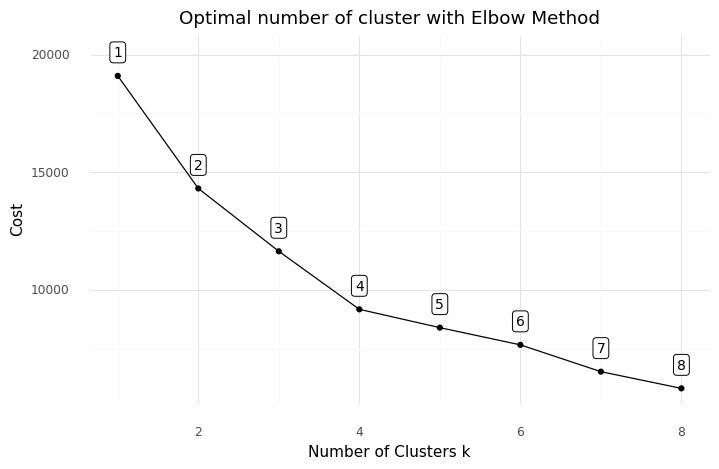

<ggplot: (152110907046)>

In [87]:
# Import module for data visualization

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [88]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([0, 1, 1, ..., 1, 0, 1], dtype=uint16)

In [89]:
# Cluster centorid
kprototype.cluster_centroids_

array([['1.386926284906227', '1.0213404130662456',
        '-0.08045334673441219', '0.40838286200179363', 'United Kingdom',
        'weekday', 'Noon'],
       ['-0.27286027804548146', '-0.21842958808742355',
        '-0.025676980957130217', '-0.12526753724006912',
        'United Kingdom', 'weekday', 'Noon'],
       ['7.463013383860326', '9.194968062600534', '-0.07166157810021245',
        '11.84095425102868', 'United Kingdom', 'weekday', 'Noon'],
       ['-0.6948253467544393', '-0.3755743107945094',
        '18.245685165509762', '-0.16135092071106755', 'United Kingdom',
        'weekday', 'Noon']], dtype='<U32')

In [90]:
# Check the cost of the clusters created
kprototype.cost_

9171.786485555287

In [91]:
# Add the cluster to the dataframe
df_kprototype['labels'] = kprototype.labels_ 
df_kprototype

Country  Product_distinct  Order_times  Avg_product_price  \
0     United Kingdom         -0.706501    -0.425314          -0.385067   
1            Iceland          0.494436     0.370524          -0.109593   
2            Finland         -0.452970    -0.027395          -0.439864   
3              Italy          0.094124    -0.425314           0.104193   
4             Norway         -0.519689    -0.425314          -0.287215   
...              ...               ...          ...                ...   
4309  United Kingdom         -0.586407    -0.425314           0.232727   
4310  United Kingdom         -0.639782    -0.425314           0.484820   
4311  United Kingdom         -0.573064    -0.292674           0.281351   
4312  United Kingdom          2.335874     1.564282          -0.303225   
4313  United Kingdom          0.000718    -0.160035          -0.313564   

     day_of_week       hour  total_price  labels  
0        weekday    Morning     9.563500       0  
1        weekend       Noon     0.252268       1  
2        weekday  Afternoon    -0.046169       1  
3        weekend    Morning    -0.068660       1  
4        weekday  Afternoon    -0.184050       1  
...          ...        ...          ...     ...  
4309     weekend    Morning    -0.197398       1  
4310     weekday    Morning    -0.212138       1  
4311     weekend       Noon    -0.199433       1  
4312     weekday  Afternoon    -0.001688       0  
4313     weekday    Morning    -0.036849       1  

[4314 rows x 8 columns]

In [92]:
df_kprototype['labels'].value_counts()

1    3657
0     632
2      17
3       8
Name: labels, dtype: int64

In [93]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=28, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=28)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=28)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

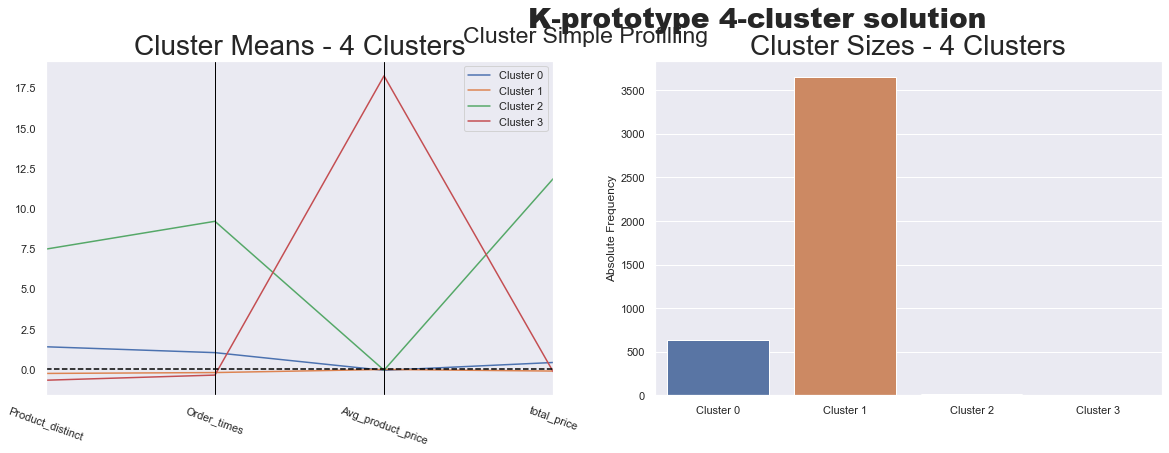

In [94]:
cluster_profiles(
    df = df_kprototype, 
    label_columns = ['labels'], 
    figsize = (20, 6), 
    compar_titles = ["K-prototype 4-cluster solution"]
)

From the above chart we can see that cluster2 and cluster3 represent very wealthy customers and possibly retailer customers respectively

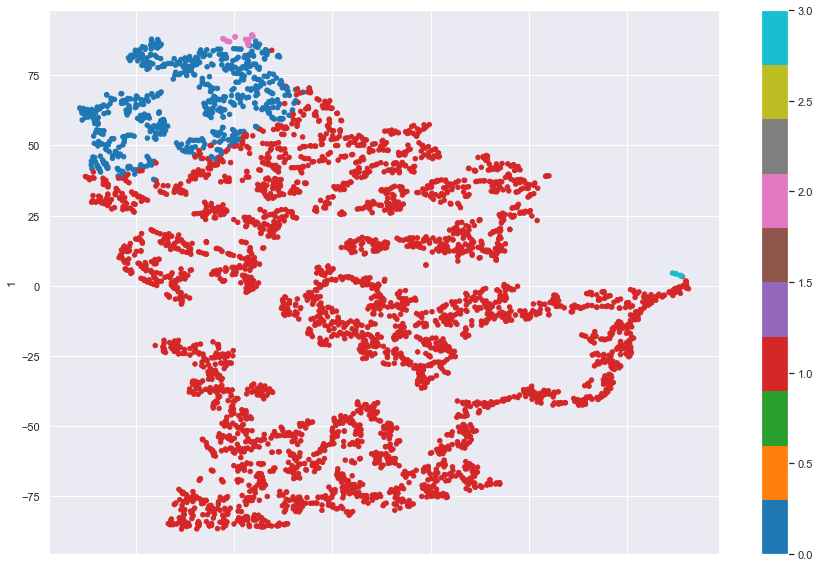

In [95]:
# t-SNE visualization for 5 clusters by 'k-means++ Clustering
two_dim = TSNE(random_state=42).fit_transform(df_kprototype[metric_features])
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_kprototype['labels'], colormap='tab10', figsize=(15,10))
plt.show()

In [96]:
df_customer['Clusters']=df_kprototype['labels']
df_customer

CustomerID         Country  Product_distinct  Order_times  \
0        12346.0  United Kingdom         -0.706501    -0.425314   
1        12347.0         Iceland          0.494436     0.370524   
2        12348.0         Finland         -0.452970    -0.027395   
3        12349.0           Italy          0.094124    -0.425314   
4        12350.0          Norway         -0.519689    -0.425314   
...          ...             ...               ...          ...   
4309     18280.0  United Kingdom         -0.586407    -0.425314   
4310     18281.0  United Kingdom         -0.639782    -0.425314   
4311     18282.0  United Kingdom         -0.573064    -0.292674   
4312     18283.0  United Kingdom          2.335874     1.564282   
4313     18287.0  United Kingdom          0.000718    -0.160035   

      Avg_product_price day_of_week       hour  total_price  Clusters  
0             -0.385067     weekday    Morning     9.563500         0  
1             -0.109593     weekend       Noon     0.252268         1  
2             -0.439864     weekday  Afternoon    -0.046169         1  
3              0.104193     weekend    Morning    -0.068660         1  
4             -0.287215     weekday  Afternoon    -0.184050         1  
...                 ...         ...        ...          ...       ...  
4309           0.232727     weekend    Morning    -0.197398         1  
4310           0.484820     weekday    Morning    -0.212138         1  
4311           0.281351     weekend       Noon    -0.199433         1  
4312          -0.303225     weekday  Afternoon    -0.001688         0  
4313          -0.313564     weekday    Morning    -0.036849         1  

[4314 rows x 9 columns]

# Association Rules

In [97]:
#merging dfp and  df_customer[['CustomerID','Clusters']] by CustomerID
df_AR = pd.merge(dfp, df_customer[['CustomerID','Clusters']], left_on='CustomerID', right_on='CustomerID', how='left').drop('CustomerID', axis=1)
df_AR = df_AR[df_AR['Clusters'].notnull()]

# drop the wealthy customers and retailer customers to build the association rules
df_AR = df_AR[(df_AR['Clusters']==0)|(df_AR['Clusters']==1) ]
df_AR.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
1    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
2    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
3    536365     22752         SET 7 BABUSHKA NESTING BOXES       2.0   
4    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER       6.0   

          InvoiceDate  UnitPrice         Country  year  month  day  hour  \
0 2010-01-12 08:26:00       2.75  United Kingdom  2010      1   12     8   
1 2010-01-12 08:26:00       3.39  United Kingdom  2010      1   12     8   
2 2010-01-12 08:26:00       3.39  United Kingdom  2010      1   12     8   
3 2010-01-12 08:26:00       7.65  United Kingdom  2010      1   12     8   
4 2010-01-12 08:26:00       4.25  United Kingdom  2010      1   12     8   

   day_of_week  total_price  Clusters  
0            1        22.00       0.0  
1            1        20.34       0.0  
2            1        20.34       0.0  
3            1        15.30       0.0  
4            1        25.50       0.0

## Association Rule for cluster 0

In [98]:
#select cluster 0 customers
df_AR_0 = df_AR[(df_AR['Clusters']==0)]

# Create the orders of Cluster 0 to build the recommendation system
CO_orders = pd.pivot_table(df_AR_0[['InvoiceNo', 'StockCode']], values=[ 'StockCode'], index=['InvoiceNo'],
                    aggfunc={'StockCode': list}).reset_index()
CO_orders.head()

InvoiceNo                                          StockCode
0    536365             [84406B, 84029G, 84029E, 22752, 21730]
1    536366                                            [22633]
2    536367  [84879, 22745, 22748, 22749, 22310, 84969, 226...
3    536368                       [22960, 22913, 22912, 22914]
4    536369                                            [21756]

In [99]:
# Using TransactionEncoder to encode the transaction of StockCode
TE=TransactionEncoder().fit(CO_orders['StockCode'])

CO_orders_encoded = TE.transform(CO_orders['StockCode'])

CO_orders_enc = pd.DataFrame(CO_orders_encoded, columns =TE.columns_)

CO_orders_enc.head()

10002  10080  10120  10124A  10124G  10125  11001  15030  15034  15036  \
0  False  False  False   False   False  False  False  False  False  False   
1  False  False  False   False   False  False  False  False  False  False   
2  False  False  False   False   False  False  False  False  False  False   
3  False  False  False   False   False  False  False  False  False  False   
4  False  False  False   False   False  False  False  False  False  False   

   15039  15044A  15044B  15044C  15044D  15058A  15058B  15058C  16008  \
0  False   False   False   False   False   False   False   False  False   
1  False   False   False   False   False   False   False   False  False   
2  False   False   False   False   False   False   False   False  False   
3  False   False   False   False   False   False   False   False  False   
4  False   False   False   False   False   False   False   False  False   

   16010  16011  16012  16014  16015  16016  16020C  16033  16045  16046  \
0  False  False  False  False  False  False   False  False  False  False   
1  False  False  False  False  False  False   False  False  False  False   
2  False  False  False  False  False  False   False  False  False  False   
3  False  False  False  False  False  False   False  False  False  False   
4  False  False  False  False  False  False   False  False  False  False   

   16048  16049  16052  16054  16156S  16161G  16161M  16161P  16161U  16162L  \
0  False  False  False  False   False   False   False   False   False   False   
1  False  False  False  False   False   False   False   False   False   False   
2  False  False  False  False   False   False   False   False   False   False   
3  False  False  False  False   False   False   False   False   False   False   
4  False  False  False  False   False   False   False   False   False   False   

   16168M  16169E  16169K  16169M  16202A  16202B  16202E  16206B  16207A  \
0   False   False   False   False   False   False   False   False   False   
1   False   False   False   False   False   False   False   False   False   
2   False   False   False   False   False   False   False   False   False   
3   False   False   False   False   False   False   False   False   False   
4   False   False   False   False   False   False   False   False   False   

   16207B  16216  16218  16219  16225  16235  16236  16237  16238  16244B  \
0   False  False  False  False  False  False  False  False  False   False   
1   False  False  False  False  False  False  False  False  False   False   
2   False  False  False  False  False  False  False  False  False   False   
3   False  False  False  False  False  False  False  False  False   False   
4   False  False  False  False  False  False  False  False  False   False   

   16248B  16254  16258A  16259  17003  17011F  17012A  17012B  17012C  \
0   False  False   False  False  False   False   False   False   False   
1   False  False   False  False  False   False   False   False   False   
2   False  False   False  False  False   False   False   False   False   
3   False  False   False  False  False   False   False   False   False   
4   False  False   False  False  False   False   False   False   False   

   17012D  17012E  17012F  17013D  17014A  17021  17038  17084A  17084J  \
0   False   False   False   False   False  False  False   False   False   
1   False   False   False   False   False  False  False   False   False   
2   False   False   False   False   False  False  False   False   False   
3   False   False   False   False   False  False  False   False   False   
4   False   False   False   False   False  False  False   False   False   

   17084N  17084P  17084R  17090A  17090D  17091A  17091J  17096  17109D  \
0   False   False   False   False   False   False   False  False   False   
1   False   False   False   False   False   False   False  False   False   
2   False   False   False   False   False   False   False  False   False   
3   False   False  

In [100]:
# Calculate the support values for every possible configuration of items (thereshold of support has been chosen 0.01 (1%))
C0_apriori = apriori(CO_orders_enc, min_support=0.01, verbose=1, use_colnames=True)#max_len=2,

Processing 410 combinations | Sampling itemset size 5 43


In [101]:
C0_apriori

support                       itemsets
0     0.021395                        (15036)
1     0.010100                       (16156S)
2     0.014884                       (16161P)
3     0.010365                       (16161U)
4     0.010365                        (16237)
...        ...                            ...
1381  0.010233   (22384, 23206, 23208, 20727)
1382  0.010100  (22411, 85099B, 21929, 22386)
1383  0.010631  (22411, 85099B, 21931, 22386)
1384  0.013156   (22423, 22697, 22698, 22699)
1385  0.011960   (22726, 22730, 22728, 22727)

[1386 rows x 2 columns]

In [102]:
# counting and seeing the distribution of the number of products on the combination
C0_apriori['length'] = C0_apriori['itemsets'].apply(lambda x: len(x))
C0_apriori['length'].value_counts()

1    644
2    538
3    191
4     13
Name: length, dtype: int64

### Cluster 0 Complementary Products

In [103]:
# calculating the metrics for all the combinations found above
C0_rulesLift = association_rules(C0_apriori, metric="lift", min_threshold=0.0)
C0_rulesLift.sort_values(by='lift', ascending=False, inplace=True)

# Find all the possible combination of complementary products using lif higher than 2
C0_Complementary=C0_rulesLift.loc[(C0_rulesLift.lift > 2)]
C0_Complementary

antecedents     consequents  antecedent support  consequent support  \
2114  (22917, 22919)         (22918)            0.011030            0.011296   
2119         (22918)  (22917, 22919)            0.011296            0.011030   
2124         (22917)  (22920, 22919)            0.011960            0.010498   
2121  (22920, 22919)         (22917)            0.010498            0.011960   
2112         (22916)  (22920, 22917)            0.011429            0.011030   
...              ...             ...                 ...                 ...   
993          (23206)         (47566)            0.064983            0.087043   
818          (22726)         (84879)            0.062458            0.080930   
819          (84879)         (22726)            0.080930            0.062458   
290          (22720)         (21212)            0.073887            0.068173   
291          (21212)         (22720)            0.068173            0.073887   

       support  confidence       lift  leverage  conviction  
2114  0.010233    0.927711  82.129695  0.010108   13.677076  
2119  0.010233    0.905882  82.129695  0.010108   10.507807  
2124  0.010233    0.855556  81.494374  0.010107    6.850396  
2121  0.010233    0.974684  81.494374  0.010107   39.027575  
2112  0.010233    0.895349  81.174699  0.010107    9.450159  
...        ...         ...        ...       ...         ...  
993   0.011960    0.184049   2.114457  0.006304    1.118887  
818   0.010631    0.170213   2.103204  0.005576    1.107597  
819   0.010631    0.131363   2.103204  0.005576    1.079325  
290   0.010365    0.140288   2.057827  0.005328    1.083883  
291   0.010365    0.152047   2.057827  0.005328    1.092175  

[2374 rows x 9 columns]

In [104]:
# Organize the complementary products by confidence
C0_Complementary.sort_values("confidence", ascending = False, inplace = True)

# counting and Seeing the distribution of the number of products of the antecedents products
C0_Complementary['length_antecedents'] = C0_Complementary['antecedents'].apply(lambda x: len(x))
C0_Complementary.groupby('length_antecedents').median()

antecedent support  consequent support   support  \
length_antecedents                                                     
1                             0.050631            0.032691  0.012492   
2                             0.023256            0.056213  0.011827   
3                             0.016545            0.068173  0.011030   

                    confidence      lift  leverage  conviction  
length_antecedents                                              
1                     0.278215  8.267166  0.010882    1.325040  
2                     0.548193  9.277397  0.010571    2.066845  
3                     0.680164  9.559040  0.009873    2.913453

In [105]:
# counting and Seeing the distribution of the number of products of the consequents products
C0_Complementary['length_consequents'] = C0_Complementary['consequents'].apply(lambda x: len(x))
C0_Complementary.groupby('length_consequents').median()

antecedent support  consequent support   support  \
length_consequents                                                     
1                             0.032691            0.050631  0.012492   
2                             0.056213            0.023256  0.011827   
3                             0.068173            0.016545  0.011030   

                    confidence      lift  leverage  conviction  \
length_consequents                                               
1                     0.450704  8.267166  0.010882    1.720745   
2                     0.231969  9.277397  0.010571    1.268064   
3                     0.163348  9.559040  0.009873    1.177301   

                    length_antecedents  
length_consequents                      
1                                  1.0  
2                                  1.0  
3                                  1.0

In [106]:
# Create a dataframe with the length of the number of products of the antecedents and consequents products
C0_length_a=pd.DataFrame(C0_Complementary['length_antecedents'].value_counts())
C0_length_c= pd.DataFrame(C0_Complementary['length_consequents'].value_counts())
C0_ante_conseq= pd.concat((C0_length_a, C0_length_c), axis=1)
C0_ante_conseq

length_antecedents  length_consequents
1                1671                1671
2                 651                 651
3                  52                  52

In [107]:
#using only the first level combinations
C0_rulesConfidence = C0_Complementary.loc[(C0_Complementary.length_antecedents == 1)]
C0_rulesConfidence

antecedents            consequents  antecedent support  \
876      (22916)                (22917)            0.011429   
885      (22918)                (22917)            0.011296   
888      (22920)                (22917)            0.011694   
891      (22918)                (22919)            0.011296   
883      (22916)                (22920)            0.011429   
...          ...                    ...                 ...   
1165    (85099B)         (20724, 21931)            0.114684   
1932    (85099B)         (22411, 23199)            0.114684   
1182    (85099B)         (20724, 22355)            0.114684   
2359    (85099B)  (22411, 21929, 22386)            0.114684   
1938    (85099B)         (23201, 22411)            0.114684   

      consequent support   support  confidence       lift  leverage  \
876             0.011960  0.010897    0.953488  79.722222  0.010760   
885             0.011960  0.010764    0.952941  79.676471  0.010629   
888             0.011960  0.011030    0.943182  78.860480  0.010890   
891             0.012226  0.010631    0.941176  76.982097  0.010493   
883             0.011694  0.010631    0.930233  79.545455  0.010498   
...                  ...       ...         ...        ...       ...   
1165            0.014618  0.010233    0.089224   6.103708  0.008556   
1932            0.014352  0.010100    0.088065   6.136003  0.008454   
1182            0.022857  0.010100    0.088065   3.852839  0.007478   
2359            0.012492  0.010100    0.088065   7.049875  0.008667   
1938            0.014086  0.010100    0.088065   6.251776  0.008484   

      conviction  length_antecedents  length_consequents  
876    21.242857                   1                   1  
885    20.995847                   1                   1  
888    17.389502                   1                   1  
891    16.792159                   1                   1  
883    14.165714                   1                   1  
...          ...                 ...                 ...  
1165    1.081914                   1                   2  
1932    1.080831                   1                   2  
1182    1.071505                   1                   2  
2359    1.082871                   1                   3  
1938    1.081123                   1                   2  

[1671 rows x 11 columns]

In [108]:
# Sort the database above using the lift
C0_rulesConfidence.sort_values("lift", ascending = False, inplace = True)
C0_rulesConfidence.head(20)

antecedents     consequents  antecedent support  consequent support  \
2119     (22918)  (22917, 22919)            0.011296            0.011030   
2124     (22917)  (22920, 22919)            0.011960            0.010498   
2112     (22916)  (22920, 22917)            0.011429            0.011030   
2117     (22917)  (22919, 22918)            0.011960            0.010631   
2113     (22917)  (22920, 22916)            0.011960            0.010631   
2107     (22917)  (22916, 22919)            0.011960            0.010498   
2111     (22920)  (22916, 22917)            0.011694            0.010897   
878      (22916)         (22918)            0.011429            0.011296   
879      (22918)         (22916)            0.011296            0.011429   
2105     (22916)  (22917, 22919)            0.011429            0.011030   
876      (22916)         (22917)            0.011429            0.011960   
877      (22917)         (22916)            0.011960            0.011429   
885      (22918)         (22917)            0.011296            0.011960   
884      (22917)         (22918)            0.011960            0.011296   
883      (22916)         (22920)            0.011429            0.011694   
882      (22920)         (22916)            0.011694            0.011429   
2123     (22920)  (22917, 22919)            0.011694            0.011030   
888      (22920)         (22917)            0.011694            0.011960   
889      (22917)         (22920)            0.011960            0.011694   
2118     (22919)  (22917, 22918)            0.012226            0.010764   

       support  confidence       lift  leverage  conviction  \
2119  0.010233    0.905882  82.129695  0.010108   10.507807   
2124  0.010233    0.855556  81.494374  0.010107    6.850396   
2112  0.010233    0.895349  81.174699  0.010107    9.450159   
2117  0.010233    0.855556  80.475694  0.010105    6.849476   
2113  0.010233    0.855556  80.475694  0.010105    6.849476   
2107  0.010100    0.844444  80.436006  0.009974    6.361082   
2111  0.010233    0.875000  80.297256  0.010105    7.912824   
878   0.010365    0.906977  80.294118  0.010236   10.628571   
879   0.010365    0.917647  80.294118  0.010236   12.004082   
2105  0.010100    0.883721  80.120482  0.009974    8.505143   
876   0.010897    0.953488  79.722222  0.010760   21.242857   
877   0.010897    0.911111  79.722222  0.010760   11.121429   
885   0.010764    0.952941  79.676471  0.010629   20.995847   
884   0.010764    0.900000  79.676471  0.010629    9.887043   
883   0.010631    0.930233  79.545455  0.010498   14.165714   
882   0.010631    0.909091  79.545455  0.010498   10.874286   
2123  0.010233    0.875000  79.329819  0.010104    7.911761   
888   0.011030    0.943182  78.860480  0.010890   17.389502   
889   0.011030    0.922222  78.860480  0.010890   12.706787   
2118  0.010233    0.836957  77.754294  0.010101    6.067313   

      length_antecedents  length_consequents  
2119                   1                   2  
2124                   1                   2  
2112                   1                   2  
2117                   1                   2  
2113                   1                   2  
2107                   1                   2  
2111                   1                   2  
878                    1                   1  
879                    1                   1  
2105                   1                   2  
876                    1                   1  
877                    1                   1  
885                    1                   1  
884                    1                   1  
883                    1                   1  
882                    1                   1  
2123                   1                   2  
888                    1                   1  
889                    1                   1  
2118                   1                   2

## Cluster 0 recommendation system 

In [109]:
def recommendations_system(stockcode, rules = C0_rulesConfidence, max_results= 5):
    
    # get the rules for this antecedent
    recommendations = rules[rules['antecedents'] == {str(stockcode)}]
    
    # converting a frozen set with one element to string
    recommendations = recommendations['consequents'].apply(iter).apply(next)
    
    #set max results
    recommendations =  recommendations[:max_results].reset_index(drop=True)
    
    # link the stockcode with the unique description
    code_to_name = dfp[~dfp.duplicated(subset=['StockCode'])].copy()[['StockCode','Description']].set_index('StockCode')['Description']
    
    i=[]
    for stockid in recommendations:  
        i.append(code_to_name[stockid])
    return i

In [110]:
recommendation_system(22919)

['HERB MARKER ROSEMARY',
 'HERB MARKER PARSLEY',
 'HERB MARKER BASIL',
 'HERB MARKER THYME',
 'HERB MARKER ROSEMARY']

In [111]:
recommendation_system(22920)

['HERB MARKER THYME',
 'HERB MARKER THYME',
 'HERB MARKER ROSEMARY',
 'HERB MARKER ROSEMARY',
 'HERB MARKER PARSLEY']

In [112]:
recommendation_system('85099B')

['JUMBO SHOPPER VINTAGE RED PAISLEY',
 'JUMBO BAG VINTAGE LEAF',
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'JUMBO STORAGE BAG SUKI',
 'JUMBO BAG ALPHABET']

## Cluster 0 Substitute Products

In [113]:
# Find all the possible combination of Substitute products using lif low than 2
C0_sub_prod=C0_rulesLift.loc[(C0_rulesLift.lift < 2)]
C0_sub_prod.median()

antecedent support    0.087043
consequent support    0.087043
support               0.011827
confidence            0.136407
lift                  1.764159
leverage              0.004806
conviction            1.069809
dtype: float64

In [114]:
# counting and Seeing the distribution of the number of products on the antecedents products
C0_sub_prod['length_antecedents'] = C0_sub_prod['antecedents'].apply(lambda x: len(x))
C0_sub_prod['length_antecedents'].value_counts()

1    30
Name: length_antecedents, dtype: int64

In [115]:
# Because combination of Substitute is only one, we can directly use it

C0_rulesConfidence_sub=C0_sub_prod
C0_rulesConfidence_sub.head()

antecedents consequents  antecedent support  consequent support   support  \
908     (47566)     (22993)            0.087043            0.062060  0.010764   
909     (22993)     (47566)            0.062060            0.087043  0.010764   
669     (22727)     (22423)            0.064319            0.096080  0.012226   
668     (22423)     (22727)            0.096080            0.064319  0.012226   
677     (84879)     (22423)            0.080930            0.096080  0.014751   

     confidence      lift  leverage  conviction  length_antecedents  
908    0.123664  1.992661  0.005362    1.070298                   1  
909    0.173448  1.992661  0.005362    1.104536                   1  
669    0.190083  1.978384  0.006046    1.116065                   1  
668    0.127248  1.978384  0.006046    1.072104                   1  
677    0.182266  1.897029  0.006975    1.105396                   1

## Cluster 0 Product Substitution system 

In [116]:
recommendation_system(22384,C0_rulesConfidence_sub)

['PARTY BUNTING']

In [117]:
recommendation_system(21212,C0_rulesConfidence_sub)

['JUMBO BAG RED RETROSPOT']

In [118]:
recommendation_system(84879,C0_rulesConfidence_sub)

['REGENCY CAKESTAND 3 TIER', 'PARTY BUNTING', 'JUMBO BAG RED RETROSPOT']

## Association Rule for cluster 1

In [119]:
#select cluster 1 customers
df_AR_1 = df_AR[(df_AR['Clusters']==1)]

# Create the orders of Cluster 1 to build the recommendation system
C1_orders = pd.pivot_table(df_AR_1[['InvoiceNo', 'StockCode']], values=[ 'StockCode'], index=['InvoiceNo'],
                    aggfunc={'StockCode': list}).reset_index()
C1_orders.head()

InvoiceNo                                          StockCode
0    536371                                            [22086]
1    536374                                            [21258]
2    536380                                            [22961]
3    536382  [10002, 21912, 21832, 22411, 22379, 22381, 227...
4    536384  [82484, 84755, 22464, 21324, 22457, 22469, 224...

In [120]:
# Using TransactionEncoder to encode the transaction of StockCode
TE=TransactionEncoder().fit(C1_orders['StockCode'])

C1_orders_encoded = TE.transform(C1_orders['StockCode'])

C1_orders_enc = pd.DataFrame(C1_orders_encoded, columns =TE.columns_)

C1_orders_enc.head()

10002  10080  10120  10123C  10124A  10124G  10125  11001  15030  15034  \
0  False  False  False   False   False   False  False  False  False  False   
1  False  False  False   False   False   False  False  False  False  False   
2  False  False  False   False   False   False  False  False  False  False   
3   True  False  False   False   False   False  False  False  False  False   
4  False  False  False   False   False   False  False  False  False  False   

   15036  15039  15044A  15044B  15044C  15044D  15058A  15058B  15058C  \
0  False  False   False   False   False   False   False   False   False   
1  False  False   False   False   False   False   False   False   False   
2  False  False   False   False   False   False   False   False   False   
3  False  False   False   False   False   False   False   False   False   
4  False  False   False   False   False   False   False   False   False   

   16008  16010  16011  16012  16014  16015  16016  16033  16043  16045  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

   16046  16048  16049  16052  16054  16156S  16161G  16161P  16161U  16162L  \
0  False  False  False  False  False   False   False   False   False   False   
1  False  False  False  False  False   False   False   False   False   False   
2  False  False  False  False  False   False   False   False   False   False   
3  False  False  False  False  False   False   False   False   False   False   
4  False  False  False  False  False   False   False   False   False   False   

   16168M  16169E  16169K  16169M  16169N  16169P  16202A  16202E  16216  \
0   False   False   False   False   False   False   False   False  False   
1   False   False   False   False   False   False   False   False  False   
2   False   False   False   False   False   False   False   False  False   
3   False   False   False   False   False   False   False   False  False   
4   False   False   False   False   False   False   False   False  False   

   16218  16219  16225  16235  16236  16237  16238  16244B  16248B  16254  \
0  False  False  False  False  False  False  False   False   False  False   
1  False  False  False  False  False  False  False   False   False  False   
2  False  False  False  False  False  False  False   False   False  False   
3  False  False  False  False  False  False  False   False   False  False   
4  False  False  False  False  False  False  False   False   False  False   

   16258A  16259  17001  17003  17007B  17011F  17012A  17012B  17012C  \
0   False  False  False  False   False   False   False   False   False   
1   False  False  False  False   False   False   False   False   False   
2   False  False  False  False   False   False   False   False   False   
3   False  False  False  False   False   False   False   False   False   
4   False  False  False  False   False   False   False   False   False   

   17012D  17012E  17012F  17013D  17014A  17021  17028J  17038  17084A  \
0   False   False   False   False   False  False   False  False   False   
1   False   False   False   False   False  False   False  False   False   
2   False   False   False   False   False  False   False  False   False   
3   False   False   False   False   False  False   False  False   False   
4   False   False   False   False   False  False   False  False   False   

   17084J  17084N  17084P  17084R  17090A  17090D  17091A  17091J  17096  \
0   False   False   False   False   False   False   False   False  False   
1   False   False   False   False   False   False   False   False  False   
2   False   False   False   False   False   False   False   False  False   
3   False   False   False   Fal

In [121]:
# Calculate the support values for every possible configuration of items (thereshold of support has been chosen 0.01 (1%))
C1_apriori = apriori(C1_orders_enc, min_support=0.01, verbose=1, use_colnames=True)#max_len=2,

Processing 52 combinations | Sampling itemset size 4 3 2


In [122]:
C1_apriori.head()

support  itemsets
0  0.015383   (15036)
1  0.012926  (16161P)
2  0.010576   (17003)
3  0.010683   (20676)
4  0.010148   (20679)

In [123]:
# counting and Seeing the distribution of the number of products on the combination
C1_apriori['length'] = C1_apriori['itemsets'].apply(lambda x: len(x))
C1_apriori['length'].value_counts()

1    453
2     86
3      5
4      1
Name: length, dtype: int64

### Cluster 1 Complementary Products

In [124]:
# calculating the metrics for all the combinations found above
C1_rulesLift = association_rules(C1_apriori, metric="lift", min_threshold=0.0)
C1_rulesLift.sort_values(by='lift', ascending=False, inplace=True)

# Find all the possible combination of complementary products using lif higher than 2
C1_Complementary=C1_rulesLift.loc[(C1_rulesLift.lift > 2)]
C1_Complementary

antecedents consequents  antecedent support  consequent support   support  \
141     (22745)     (22748)            0.014208            0.015062  0.011324   
140     (22748)     (22745)            0.015062            0.014208  0.011324   
104     (22569)     (22570)            0.014635            0.016238  0.010042   
105     (22570)     (22569)            0.016238            0.014635  0.010042   
111     (22578)     (22579)            0.023929            0.014315  0.011751   
..          ...         ...                 ...                 ...       ...   
91      (22423)     (23245)            0.091123            0.032475  0.012178   
88      (22423)     (22720)            0.091123            0.054161  0.010789   
89      (22720)     (22423)            0.054161            0.091123  0.010789   
167     (84879)     (47566)            0.077022            0.069544  0.010896   
166     (47566)     (84879)            0.069544            0.077022  0.010896   

     confidence       lift  leverage  conviction  
141    0.796992  52.912387  0.011110    4.851729  
140    0.751773  52.912387  0.011110    3.971334  
104    0.686131  42.255763  0.009804    3.134313  
105    0.618421  42.255763  0.009804    2.582335  
111    0.491071  34.305370  0.011408    1.936785  
..          ...        ...       ...         ...  
91     0.133646   4.115328  0.009219    1.116778  
88     0.118406   2.186184  0.005854    1.072873  
89     0.199211   2.186184  0.005854    1.134977  
167    0.141470   2.034259  0.005540    1.083778  
166    0.156682   2.034259  0.005540    1.094461  

[212 rows x 9 columns]

In [125]:
# Organize the complementary products by confidence
C1_Complementary.sort_values("confidence", ascending = False, inplace = True)

# counting and Seeing the distribution of the number of products of the antecedents products
C1_Complementary['length_antecedents'] = C1_Complementary['antecedents'].apply(lambda x: len(x))
C1_Complementary.groupby('length_antecedents').median()

antecedent support  consequent support   support  \
length_antecedents                                                     
1                             0.030659            0.028095  0.012285   
2                             0.019976            0.029698  0.013140   
3                             0.014582            0.034398  0.011858   

                    confidence       lift  leverage  conviction  
length_antecedents                                               
1                     0.424149  12.590291  0.011316    1.684492  
2                     0.657754  23.931722  0.011591    2.702985  
3                     0.817145  25.853784  0.011398    5.858875

In [126]:
# counting and Seeing the distribution of the number of products of the consequents products
C1_Complementary['length_consequents'] = C1_Complementary['consequents'].apply(lambda x: len(x))
C1_Complementary.groupby('length_consequents').median()

antecedent support  consequent support   support  \
length_consequents                                                     
1                             0.028095            0.030659  0.012285   
2                             0.029698            0.019976  0.013140   
3                             0.034398            0.014582  0.011858   

                    confidence       lift  leverage  conviction  \
length_consequents                                                
1                     0.442446  12.590291  0.011316    1.747514   
2                     0.478448  23.931722  0.011591    1.887041   
3                     0.344990  25.853784  0.011398    1.506639   

                    length_antecedents  
length_consequents                      
1                                  1.0  
2                                  1.0  
3                                  1.0

In [127]:
# Create a dataframe with the length of the number of products of the antecedents and consequents products
C1_length_a=pd.DataFrame(C1_Complementary['length_antecedents'].value_counts())
C1_length_c= pd.DataFrame(C1_Complementary['length_consequents'].value_counts())
C1_ante_conseq= pd.concat((C1_length_a, C1_length_c), axis=1)
C1_ante_conseq

length_antecedents  length_consequents
1                 187                 187
2                  21                  21
3                   4                   4

In [128]:
#using only the first level combinations
C1_rulesConfidence = C1_Complementary.loc[(C1_Complementary.length_antecedents == 1)]
C1_rulesConfidence

antecedents            consequents  antecedent support  \
110     (22579)                (22578)            0.014315   
120     (22698)                (22697)            0.026493   
141     (22745)                (22748)            0.014208   
69      (22617)                (22138)            0.025104   
124     (22698)                (22699)            0.026493   
..          ...                    ...                 ...   
187     (22423)         (22698, 22699)            0.091123   
167     (84879)                (47566)            0.077022   
91      (22423)                (23245)            0.091123   
212     (22423)  (22698, 22697, 22699)            0.091123   
88      (22423)                (22720)            0.091123   

     consequent support   support  confidence       lift  leverage  \
110            0.023929  0.011751    0.820896  34.305370  0.011408   
120            0.033437  0.021686    0.818548  24.480612  0.020800   
141            0.015062  0.011324    0.796992  52.912387  0.011110   
69             0.053840  0.019549    0.778723  14.463551  0.018198   
124            0.035359  0.019976    0.754032  21.324761  0.019040   
..                  ...       ...         ...        ...       ...   
187            0.019976  0.013140    0.144197   7.218330  0.011319   
167            0.069544  0.010896    0.141470   2.034259  0.005540   
91             0.032475  0.012178    0.133646   4.115328  0.009219   
212            0.017840  0.011858    0.130129   7.294235  0.010232   
88             0.054161  0.010789    0.118406   2.186184  0.005854   

     conviction  length_antecedents  length_consequents  
110    5.449729                   1                   1  
120    5.326838                   1                   1  
141    4.851729                   1                   1  
69     4.275914                   1                   1  
124    3.921817                   1                   1  
..          ...                 ...                 ...  
187    1.145151                   1                   2  
167    1.083778                   1                   1  
91     1.116778                   1                   1  
212    1.129087                   1                   3  
88     1.072873                   1                   1  

[187 rows x 11 columns]

In [129]:
# Sort the database above using the lift
C1_rulesConfidence.sort_values("lift", ascending = False, inplace = True)
C1_rulesConfidence.head(20)

antecedents            consequents  antecedent support  \
141     (22745)                (22748)            0.014208   
140     (22748)                (22745)            0.015062   
104     (22569)                (22570)            0.014635   
105     (22570)                (22569)            0.016238   
110     (22579)                (22578)            0.014315   
111     (22578)                (22579)            0.023929   
107     (22577)                (22578)            0.024463   
106     (22578)                (22577)            0.023929   
115     (22629)                (22630)            0.023181   
114     (22630)                (22629)            0.021258   
108     (22579)                (22577)            0.014315   
109     (22577)                (22579)            0.024463   
70      (22144)                (22142)            0.022113   
71      (22142)                (22144)            0.017199   
102     (22570)                (22568)            0.016238   
103     (22568)                (22570)            0.022968   
214     (22698)  (22423, 22697, 22699)            0.026493   
142     (22749)                (22750)            0.022434   
143     (22750)                (22749)            0.019656   
158     (23295)                (23293)            0.017840   

     consequent support   support  confidence       lift  leverage  \
141            0.015062  0.011324    0.796992  52.912387  0.011110   
140            0.014208  0.011324    0.751773  52.912387  0.011110   
104            0.016238  0.010042    0.686131  42.255763  0.009804   
105            0.014635  0.010042    0.618421  42.255763  0.009804   
110            0.023929  0.011751    0.820896  34.305370  0.011408   
111            0.014315  0.011751    0.491071  34.305370  0.011408   
107            0.023929  0.017306    0.707424  29.563358  0.016720   
106            0.024463  0.017306    0.723214  29.563358  0.016720   
115            0.021258  0.014315    0.617512  29.047866  0.013822   
114            0.023181  0.014315    0.673367  29.047866  0.013822   
108            0.024463  0.010148    0.708955  28.980480  0.009798   
109            0.014315  0.010148    0.414847  28.980480  0.009798   
70             0.017199  0.011003    0.497585  28.930987  0.010623   
71             0.022113  0.011003    0.639752  28.930987  0.010623   
102            0.022968  0.010789    0.664474  28.930875  0.010417   
103            0.016238  0.010789    0.469767  28.930875  0.010417   
214            0.015597  0.011858    0.447581  28.697277  0.011445   
142            0.019656  0.012605    0.561905  28.586905  0.012165   
143            0.022434  0.012605    0.641304  28.586905  0.012165   
158            0.023822  0.011751    0.658683  27.649902  0.011326   

     conviction  length_antecedents  length_consequents  
141    4.851729                   1                   1  
140    3.971334                   1                   1  
104    3.134313                   1                   1  
105    2.582335                   1                   1  
110    5.449729                   1                   1  
111    1.936785                   1                   1  
107    3.336123                   1                   1  
106    3.524520                   1                   1  
115    2.558879                   1                   1  
114    2.990568                   1                   1  
108    3.351844                   1                   1  
109    1.684492                   1                   1  
70     1.956152                   1                   1  
71     2.714479                   1                   1  
102    2.911940                   1                   1  
103    1.855341                   1                   1  
214    1.781986                   1                   3  
142    2.237742                   1                   1  
143    2.725337                   1                   1  
158    2.860030                   1                   1

## Cluster 1 recommendation system 

In [130]:
recommendation_system(22630,C1_rulesConfidence)

['SPACEBOY LUNCH BOX ']

In [131]:
recommendation_system(22699,C1_rulesConfidence)

['REGENCY CAKESTAND 3 TIER',
 'REGENCY CAKESTAND 3 TIER',
 'PINK REGENCY TEACUP AND SAUCER',
 'REGENCY CAKESTAND 3 TIER',
 'PINK REGENCY TEACUP AND SAUCER']

In [132]:
recommendation_system(22577,C1_rulesConfidence)

['WOODEN STAR CHRISTMAS SCANDINAVIAN', 'WOODEN TREE CHRISTMAS SCANDINAVIAN']

## Cluster 1 Substitute Products

In [133]:
# Find all the possible combination of Substitute products using lif low than 2
C1_sub_prod=C1_rulesLift.loc[(C0_rulesLift.lift < 2)]
C1_sub_prod.median()

antecedent support     0.016825
consequent support     0.031621
support                0.010683
confidence             0.666921
lift                  20.992082
leverage               0.010173
conviction             3.589743
dtype: float64

In [134]:
# counting and Seeing the distribution of the number of products on the antecedents products
C1_sub_prod['length_antecedents'] = C1_sub_prod['antecedents'].apply(lambda x: len(x))
C1_sub_prod

antecedents consequents  antecedent support  consequent support  \
196  (22726, 22728)     (22727)            0.013140            0.037816   
197  (22726, 22727)     (22728)            0.020511            0.025425   

      support  confidence       lift  leverage  conviction  length_antecedents  
196  0.010683    0.813008  21.498783  0.010186    5.145590                   2  
197  0.010683    0.520833  20.485382  0.010161    2.033896                   2

# COLD START

In [135]:
df_CS=dfp.copy()

In [136]:
def Cold_start_function(day_of_week,hour,month,country):
    Cold_list=[]
    # recommand by The most different people bought
    # all data
    Total_pop=pd.pivot_table(df_CS, values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID':lambda x: len(x.unique()),}).reset_index().sort_values('CustomerID',ascending=False)    
    
    # basic on the day of week
    day_pop=pd.pivot_table(df_CS[df_CS.day_of_week==day_of_week], values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID':lambda x: len(x.unique()),}).reset_index().sort_values('CustomerID',ascending=False)
    
    # basic on the hour
    hour_pop=pd.pivot_table(df_CS[df_CS.hour==hour], values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID':lambda x: len(x.unique()),}).reset_index().sort_values('CustomerID',ascending=False)
    
    # basic on the month
    month_pop=pd.pivot_table(df_CS[df_CS.month==month], values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID':lambda x: len(x.unique()),}).reset_index().sort_values('CustomerID',ascending=False)
    
    # basic on location
    country_pop=pd.pivot_table(df_CS[df_CS.Country==country], values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID':lambda x: len(x.unique()),}).reset_index().sort_values('CustomerID',ascending=False)
    
    # basic on local and the day of week
    c_day_pop=pd.pivot_table(df_CS[(df_CS.Country==country)&(df_CS.day_of_week==day_of_week)], values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID':lambda x: len(x.unique()),}).reset_index().sort_values('CustomerID',ascending=False)
    
    # basic on local  on the hour
    c_hour_pop=pd.pivot_table(df_CS[(df_CS.Country==country)&(df_CS.hour==hour)], values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID':lambda x: len(x.unique()),}).reset_index().sort_values('CustomerID',ascending=False)
    
    # basic on local  on the month
    c_month_pop=pd.pivot_table(df_CS[(df_CS.Country==country)&(df_CS.month==month)], values=[ 'CustomerID'], index=['Description'],
                    aggfunc={'CustomerID':lambda x: len(x.unique()),}).reset_index().sort_values('CustomerID',ascending=False)
    
    # got the popular product from diffrent suggestion
    Cold_list.append(Total_pop['Description'][:2].to_list())
    Cold_list.append(day_pop['Description'][:2].to_list())
    Cold_list.append(hour_pop['Description'][:2].to_list())
    Cold_list.append(month_pop['Description'][:2].to_list())
    Cold_list.append(country_pop['Description'][:2].to_list())
    Cold_list.append(c_day_pop['Description'][:2].to_list())
    Cold_list.append(c_hour_pop['Description'][:2].to_list())
    Cold_list.append(c_month_pop['Description'][:2].to_list())
    
    Cold_list = np.unique([str(item[0]) for item in Cold_list])
    
    return Cold_list
    

### Test Cold Start

In [137]:
#the input is the datetime and location, we can got it when the user enter the website
# Tuesday 10:00 February 'United Kingdom'
Cold_start_function(2,10,2,'United Kingdom')

array(['REGENCY CAKESTAND 3 TIER', 'SET OF 3 CAKE TINS PANTRY DESIGN '],
      dtype='<U33')

In [138]:
# Monday 9:00 April 'France'
Cold_start_function(1,9,4,'France')

array(['LUNCH BAG APPLE DESIGN', 'LUNCH BAG SPACEBOY DESIGN ',
       'RABBIT NIGHT LIGHT', 'REGENCY CAKESTAND 3 TIER'], dtype='<U26')

In [139]:
#Sunday 18:00 December 'Germany'
Cold_start_function(0,18,12,'Germany')

array(['6 RIBBONS RUSTIC CHARM', 'REGENCY CAKESTAND 3 TIER',
       'ROUND SNACK BOXES SET OF4 WOODLAND '], dtype='<U35')